<a href="https://colab.research.google.com/github/duskovesic/Machine-Learning/blob/main/NN_BinarnaKlasifikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uvod

U ovoj svesci je primer rešavanja problema binarne klasifikacije.
Koristi se baza podataka „Breast Cancer Database“.
U bazi se nalaze podaci o tumorima dojke i koristi se za klasifikaciju prirode tumora - da li je benigni ili maligni.
Nakon učitavanja i standardizacije podataka, kreirana je neuronska mreža sa dva skrivena sloja koja je istrenirana da na osnovu podataka iz baze određuje prirodu tumora.


# Importovanje biblioteka i setapovanje

In [ ]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

from matplotlib import pyplot as plt

RS = 123
NUM_NEURONS_1 = 20
NUM_NEURONS_2 = 10
BATCH_SIZE = 32
NUM_EPOCHS = 50

# Učitavanje podataka

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape, y.shape

((569, 30), (569,))

# Train-test podela

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RS, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [ ]:
np.sum(y_train == 1)/len(y_train), np.sum(y_test == 1)/len(y_test)

(0.628140703517588, 0.6257309941520468)

# Standardizacija

In [ ]:
X_train, X_test

(array([[1.299e+01, 1.423e+01, 8.408e+01, ..., 5.850e-02, 2.432e-01,
         1.009e-01],
        [1.242e+01, 1.504e+01, 7.861e+01, ..., 4.052e-02, 2.901e-01,
         6.783e-02],
        [1.496e+01, 1.910e+01, 9.703e+01, ..., 1.489e-01, 2.962e-01,
         8.472e-02],
        ...,
        [1.171e+01, 1.667e+01, 7.472e+01, ..., 6.968e-02, 1.712e-01,
         7.343e-02],
        [1.281e+01, 1.306e+01, 8.129e+01, ..., 3.990e-02, 1.783e-01,
         7.319e-02],
        [1.263e+01, 2.076e+01, 8.215e+01, ..., 1.105e-01, 2.226e-01,
         8.486e-02]]),
 array([[9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
         6.559e-02],
        [1.614e+01, 1.486e+01, 1.043e+02, ..., 1.129e-01, 2.778e-01,
         7.012e-02],
        [1.247e+01, 1.860e+01, 8.109e+01, ..., 1.015e-01, 3.014e-01,
         8.750e-02],
        ...,
        [1.729e+01, 2.213e+01, 1.144e+02, ..., 1.528e-01, 3.067e-01,
         7.484e-02],
        [1.390e+01, 1.924e+01, 8.873e+01, ..., 8.150e-02, 2.356e-01,
   

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test

(array([[-0.32429881, -1.15003767, -0.32535806, ..., -0.86662682,
         -0.76393673,  0.89012251],
        [-0.4848383 , -0.96201766, -0.54956587, ..., -1.14132047,
         -0.00667757, -0.9073904 ],
        [ 0.23054817, -0.01959635,  0.20544469, ...,  0.51448034,
          0.09181456,  0.01066201],
        ...,
        [-0.68480853, -0.5836564 , -0.70901164, ..., -0.69582175,
         -1.92646679, -0.60300357],
        [-0.37499549, -1.42162214, -0.43971634, ..., -1.15079267,
         -1.81182841, -0.61604872],
        [-0.42569217,  0.36572861, -0.40446612, ..., -0.07218464,
         -1.0965495 ,  0.01827168]]),
 array([[-1.24528848, -0.22386501, -1.28244257, ..., -1.76037426,
         -1.60838565, -1.02914513],
        [ 0.56289307, -1.00379989,  0.50343203, ..., -0.03551808,
         -0.20527646, -0.78291793],
        [-0.47075589, -0.13565809, -0.44791407, ..., -0.20968425,
          0.17577506,  0.16176832],
        ...,
        [ 0.88678852,  0.68373777,  0.91741719, ...,  

# Kreiranje mreže

In [ ]:
model = Sequential([
    InputLayer(input_shape=((X_train.shape[1],))),
    Dense(units=NUM_NEURONS_1, activation="relu"),
    Dense(units=NUM_NEURONS_2, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 20)                620       
                                                                 
 dense_35 (Dense)            (None, 10)                210       
                                                                 
 dense_36 (Dense)            (None, 1)                 11        
                                                                 
Total params: 841 (3.29 KB)
Trainable params: 841 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", metrics="accuracy", loss="binary_crossentropy")

#Treniranje mreže

In [ ]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 0.7471 - accuracy: 0.4196
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.6558
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.8442
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.9070
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.9296
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.9347
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.9447
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9472
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1869 - accuracy: 0.9548
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9573
Epoch 11/50
13/13 [

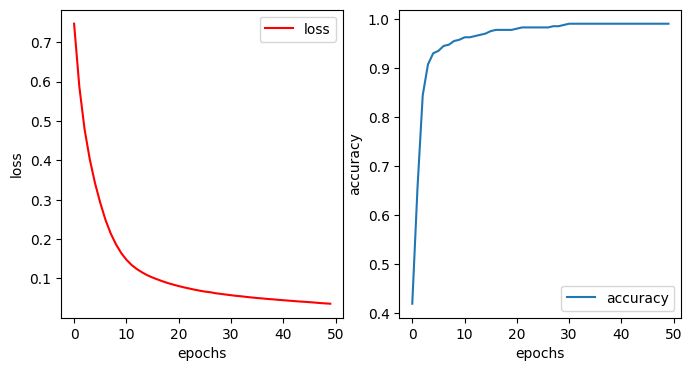

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(history.epoch, history.history["loss"], label="loss", color="red")
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].legend()

ax[1].plot(history.epoch, history.history["accuracy"], label="accuracy")
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].legend()

plt.show()

#Ocenjivanje mreže

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

6/6 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9766


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
scores

[0.06323706358671188, 0.9766082167625427]

In [ ]:
y_predict = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [ ]:
y_predict

array([[9.9999571e-01],
       [9.2678380e-01],
       [9.2778492e-01],
       [9.9433869e-01],
       [1.0558024e-06],
       [1.7465467e-14],
       [1.6884084e-04],
       [9.9997395e-01],
       [9.8815107e-01],
       [9.9997640e-01],
       [6.4252703e-08],
       [9.9804306e-01],
       [5.3552538e-03],
       [1.8936952e-04],
       [1.0939891e-02],
       [9.9990726e-01],
       [2.2300624e-07],
       [9.9833864e-01],
       [9.8932958e-01],
       [9.5302230e-01],
       [9.9992096e-01],
       [9.9918842e-01],
       [5.6326862e-05],
       [9.5660585e-01],
       [6.5901710e-05],
       [9.8716831e-01],
       [9.9664068e-01],
       [9.9993610e-01],
       [9.9067032e-01],
       [3.8311546e-06],
       [9.9999869e-01],
       [2.2860529e-02],
       [9.9063283e-01],
       [9.9698246e-01],
       [9.9313933e-01],
       [9.9997902e-01],
       [4.4288514e-03],
       [9.9992412e-01],
       [9.9470913e-01],
       [9.8901647e-01],
       [9.8452574e-01],
       [9.988591

In [ ]:
y_test.shape, y_predict.shape

((171,), (171, 1))

In [ ]:
y_predict = y_predict.reshape(171)
y_predict

array([9.9999571e-01, 9.2678380e-01, 9.2778492e-01, 9.9433869e-01,
       1.0558024e-06, 1.7465467e-14, 1.6884084e-04, 9.9997395e-01,
       9.8815107e-01, 9.9997640e-01, 6.4252703e-08, 9.9804306e-01,
       5.3552538e-03, 1.8936952e-04, 1.0939891e-02, 9.9990726e-01,
       2.2300624e-07, 9.9833864e-01, 9.8932958e-01, 9.5302230e-01,
       9.9992096e-01, 9.9918842e-01, 5.6326862e-05, 9.5660585e-01,
       6.5901710e-05, 9.8716831e-01, 9.9664068e-01, 9.9993610e-01,
       9.9067032e-01, 3.8311546e-06, 9.9999869e-01, 2.2860529e-02,
       9.9063283e-01, 9.9698246e-01, 9.9313933e-01, 9.9997902e-01,
       4.4288514e-03, 9.9992412e-01, 9.9470913e-01, 9.8901647e-01,
       9.8452574e-01, 9.9885917e-01, 9.9998850e-01, 9.5900856e-03,
       3.5693973e-10, 9.9994451e-01, 9.9977767e-01, 9.9798894e-01,
       9.7071236e-01, 9.9858409e-01, 9.9724215e-01, 4.0403510e-08,
       9.9994600e-01, 6.3523471e-01, 9.9829751e-01, 9.9788052e-01,
       3.9732829e-08, 9.9979639e-01, 9.9212813e-01, 9.9962980e

In [ ]:
y_test.shape, y_predict.shape

((171,), (171,))

In [ ]:
y_predict_01 = np.where(y_predict < 0.5, 0, 1)

In [ ]:
y_predict_01

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
np.count_nonzero(np.where(y_predict_01 != y_test))

4

In [ ]:
np.count_nonzero(np.where(y_predict_01 < y_test)), np.count_nonzero(np.where(y_predict_01 > y_test))

(0, 4)

In [ ]:
print(confusion_matrix(y_test, y_predict_01))

[[ 60   4]
 [  0 107]]
